## Modelo para o Sensor CEI

Este dataset **"DataCEI.csv"** possui informações dispostas em colunas sobre as características dos objetos que passam pelo sensor:

* **Tamanho**:  Segue a classificação do CEI2020 (Tamanho='0' - Grande 100%).
* **Referencia**:  Referência dinâmica do *Threshold.
* **NumAmostra**:  Número de amostras adquiridas.
* **Area**:  Somatório das Amplitudes das amostras.
* **Delta**:  Máxima Amplitude da amostra.
* **Output1**:  Peça tipo 1.
* **Output2**:  Peça tipo 2.



### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Função do cáculo da sigmóide
def sigmoid(x):
    return 1/(1+np.exp(-x))

### Carregando os dados

Vamos começar lendo o arquivo DataCEI.csv em um dataframe do pandas.

In [2]:
DataSet=pd.read_csv('arruela_.csv')

In [3]:
DataSet.head()

,Hora,Tamanho,Referencia,NumAmostra,Area,Delta,Output1,Output2
0,13:00:06,53,25,69,81,68,1,0
1,13:00:07,53,26,89,87,56,1,0
2,13:00:08,53,27,68,69,55,1,0
3,13:00:09,53,28,36,50,80,1,0
4,13:00:10,53,29,71,72,50,1,0


In [4]:
DataSet['Tamanho'].unique()

array([53, 64])

In [5]:
DataSet['Referencia'].unique()

array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58,
       59, 60, 62, 63, 64])

In [6]:
len(DataSet['Referencia'].unique())

39

In [7]:
# 3 features
# DataSet.drop(['Hora','Tamanho','Referencia'],axis=1,inplace=True)

In [8]:
# 4 features
# DataSet.drop(['Hora','Referencia'],axis=1,inplace=True)

In [9]:
# 5 features
DataSet.drop(['Hora'],axis=1,inplace=True)

In [10]:
DataSet.head()

,Tamanho,Referencia,NumAmostra,Area,Delta,Output1,Output2
0,53,25,69,81,68,1,0
1,53,26,89,87,56,1,0
2,53,27,68,69,55,1,0
3,53,28,36,50,80,1,0
4,53,29,71,72,50,1,0


In [11]:
DataSet.describe()

,Tamanho,Referencia,NumAmostra,Area,Delta,Output1,Output2
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,53.126437,58.310345,59.777778,63.697318,54.747126,0.375479,0.624521
std,1.174779,9.199888,17.293075,30.629366,35.548413,0.485177,0.485177
min,53.000000,25.000000,3.000000,6.000000,17.000000,0.000000,0.000000
25%,53.000000,54.000000,50.000000,46.000000,38.000000,0.000000,0.000000
50%,53.000000,64.000000,59.000000,56.000000,44.000000,0.000000,1.000000
75%,53.000000,64.000000,69.000000,68.000000,54.000000,1.000000,1.000000
max,64.000000,64.000000,120.000000,201.000000,251.000000,1.000000,1.000000


### Váriaveis do *Dataset*

In [12]:
DataSet.columns

Index(['Tamanho', 'Referencia', 'NumAmostra', 'Area', 'Delta', 'Output1',
       'Output2'],
      dtype='object')

### Número de Peças

#### Vamos classificar os grupos pelo número de peças: 
1. Grupo com uma peça
2. Grupo com duas peças

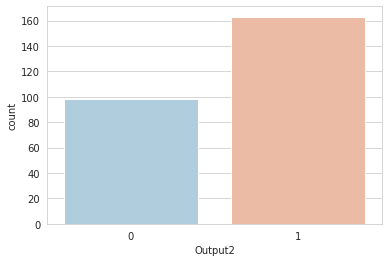

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Output2',data=DataSet,palette='RdBu_r')
plt.show()

#### Gráfico da distribuição das áreas das peças

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


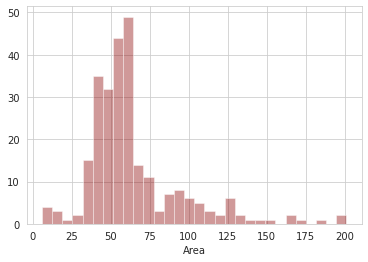

In [14]:
sns.distplot(DataSet['Area'].dropna(),kde=False,color='darkred',bins=30)
plt.show()

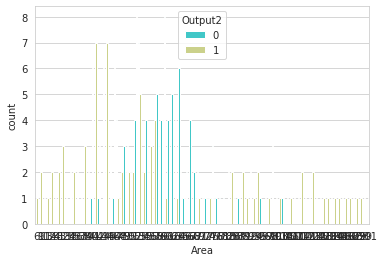

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Area',hue='Output2',data=DataSet,palette='rainbow')
plt.show()

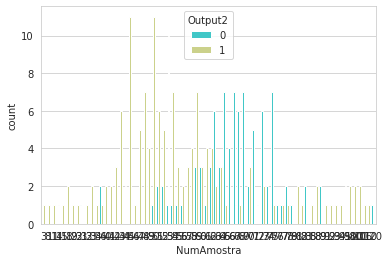

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='NumAmostra',hue='Output2',data=DataSet,palette='rainbow')
plt.show()

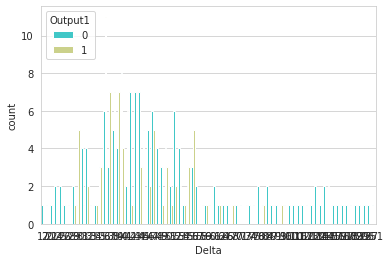

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Delta',hue='Output1',data=DataSet,palette='rainbow')
plt.show()

## As variáveis preditoras e a variável de resposta

Para treinar o modelo de regressão, primeiro precisaremos dividir nossos dados em uma matriz **X** que contenha os dados das variáveis preditoras e uma matriz **y** com os dados da variável de destino.

### Matrizes X e y

In [18]:
#X = DataSet[[ 'NumAmostra', 'Area', 'Delta']]
#y = DataSet[['Output1','Output2']]

### Relação entre as variáveis preditoras

####  Algumas questões importantes
1. Pelo menos um dos preditores ***x1, x2, ... ,x5***  é útil na previsão da resposta?
2. Todos os preditores ajudam a explicar **y**, ou apenas um subconjunto dos preditores?
3. Quão bem o modelo se ajusta aos dados?
4. Dado um conjunto de valores de previsão, quais valores de resposta devemos prever e quais as métricas indicam um bom modelo de previsão?

**Gráficos simples de dispersão**

Pelos gráficos abaixo percebemos ... nossa variável de resposta

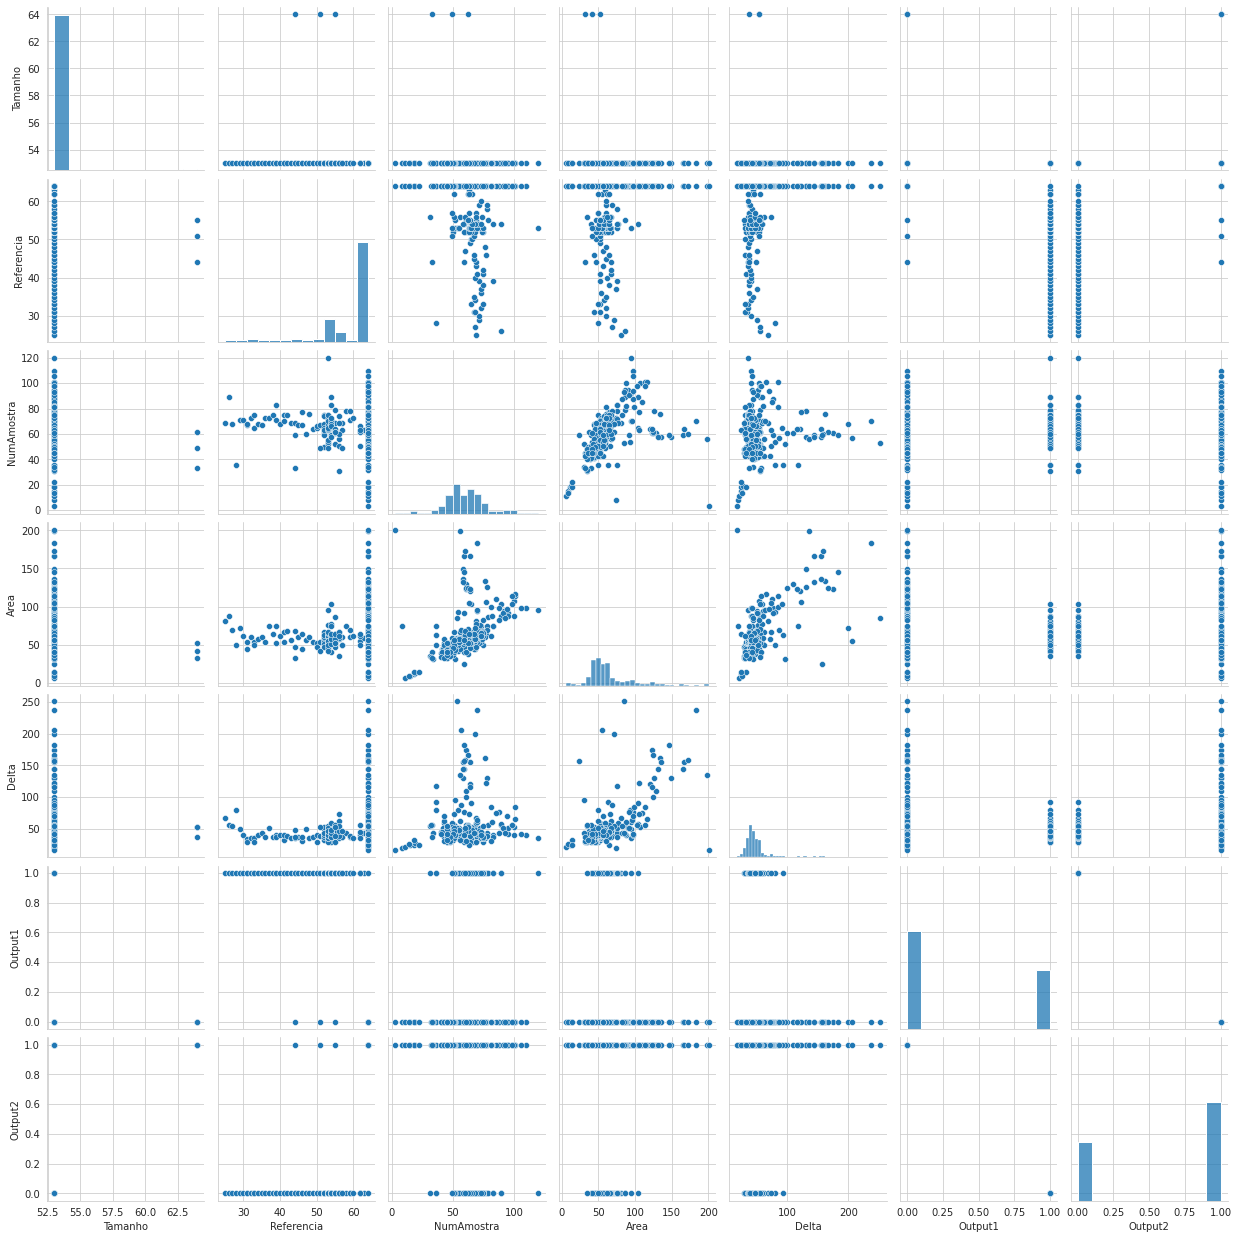

In [19]:
sns.pairplot(DataSet)
plt.show()

**Mapa de Calor**

O gráfico abaixo mostra através de uma escala de cores a correlação entre as variáveis do *Dataset*. Se observarmos as cores deste gráfico, a variável preditora **'Area'** possui maior correlação com a variável de resposta **'Output'** e a variável **'NumAmostra'** a menor.

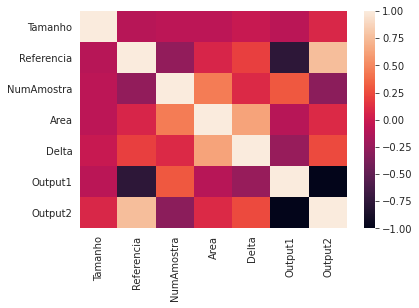

In [20]:
sns.heatmap(DataSet.corr())
plt.show()

## Normalização dos Dados

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
DataScaled=scaler.fit_transform(DataSet)

In [22]:
# 3 features
# DataSetScaled=pd.DataFrame(np.array(DataScaled),columns = ['Amostra', 'Area', 'Delta', 'Output1','Output2'])

In [23]:
# 4 features
# DataSetScaled=pd.DataFrame(np.array(DataScaled),columns = ['Tamanho', 'Amostra', 'Area', 'Delta', 'Output1','Output2'])

In [24]:
# 5 features
DataSetScaled=pd.DataFrame(np.array(DataScaled),columns = ['Referencia', 'Tamanho', 'Amostra', 'Area', 'Delta', 'Output1','Output2'])

In [25]:
DataSetScaled.head()

,Referencia,Tamanho,Amostra,Area,Delta,Output1,Output2
0,-0.107833,-3.627690,0.534314,0.565990,0.373528,1.289676,-1.289676
1,-0.107833,-3.518784,1.693069,0.762257,0.035312,1.289676,-1.289676
2,-0.107833,-3.409879,0.476377,0.173457,0.007127,1.289676,-1.289676
3,-0.107833,-3.300973,-1.377630,-0.448055,0.711745,1.289676,-1.289676
4,-0.107833,-3.192067,0.650190,0.271590,-0.133796,1.289676,-1.289676


### Conjunto de dados para o treinamento

In [26]:
X = DataSetScaled.drop(['Output1', 'Output2'],axis=1)
y = DataSet[['Output1','Output2']]

## Separando os dados de treinamento e de validação

Agora vamos dividir os dados em um conjunto de treinamento e um conjunto de testes. Vamos treinar o modelo no conjunto de treinamento, em seguida, usar o conjunto de teste para validar o modelo.

Em nosso exemplo iremos separar de forma randômica 33% dos dados para validação. Estes dados não serão utilizados para determinação dos coeficientes preditores do modelo. 


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

print(y_test)
print(X_test)

     Output1  Output2
89         1        0
212        0        1
218        0        1
96         1        0
88         1        0
..       ...      ...
22         1        0
42         1        0
160        0        1
93         1        0
50         1        0

[79 rows x 2 columns]
     Referencia   Tamanho   Amostra      Area     Delta
89    -0.107833 -0.469422  0.476377 -0.186366 -0.331089
212   -0.107833  0.619637 -0.856191 -1.036855 -0.725675
218   -0.107833  0.619637  1.229567 -0.088232 -0.669306
96    -0.107833 -0.251610 -1.667319 -0.938722  0.007127
88    -0.107833 -0.469422 -0.103000 -0.415344 -0.472013
..          ...       ...       ...       ...       ...
22    -0.107833 -1.667386  0.534314 -0.251788 -0.528382
42    -0.107833 -0.142704  0.534314 -0.120943 -0.500197
160   -0.107833  0.619637  2.214508  1.285635  0.035312
93    -0.107833 -0.360516  0.128750  0.009901  0.035312
50    -0.107833  0.401825  0.360501 -0.055521 -0.387459

[79 rows x 5 columns]


## Criando o Modelo de MPL

## Análise e alterações Andrieli

### Teste 1

Vou adicionar as variaveis do algoritmo de backpropagation aqui, pra facilitar a documentação das mudanças efetudas.

Vou iniciar com alguns parâmentros conservadores, pra ver como o modelo se comporta.

In [28]:
#Tamanho do DataSet de Treinamento
n_records, n_features = X_train.shape

#Arquitetura da MPL
N_input = 3
N_hidden = 5
N_output = 2
learnrate = 0.1

# Parametros Backpropagation
epochs = 20000
last_loss=None
EvolucaoError=[]
IndiceError=[]

# A Acurácia da Predição é de: 0.848

Pela evolução do erro, observei que o aprendizado não havia estabilizado. Então, ainda há possibilidade de aprendizado. 

Vou aumentar as épocas.

### Teste 2

In [29]:
#Tamanho do DataSet de Treinamento
n_records, n_features = X_train.shape

#Arquitetura da MPL
N_input = 3
N_hidden = 5
N_output = 2
learnrate = 0.1

# Parametros Backpropagation
epochs = 200000
last_loss=None
EvolucaoError=[]
IndiceError=[]

# A Acurácia da Predição é de: 0.861

Hum. O Aprendizado estabilizou aproximadamente em 100000 épocas.

Vou tentar esta mesma configuração com 100000 épocas e ver se a acurácia se mantém.

### Teste 3

In [30]:
#Tamanho do DataSet de Treinamento
n_records, n_features = X_train.shape

#Arquitetura da MPL
N_input = 3
N_hidden = 5
N_output = 2
learnrate = 0.1

# Parametros Backpropagation
epochs = 100000
last_loss=None
EvolucaoError=[]
IndiceError=[]

# A Acurácia da Predição é de: 0.861

De fato. Manteve a acurácia

Vou tentar reduzir o learning rate. 

Primeiro com poucas épocas, só pra avaliar a evolução.

### Teste 4

In [31]:
#Tamanho do DataSet de Treinamento
n_records, n_features = X_train.shape

#Arquitetura da MPL
N_input = 3
N_hidden = 5
N_output = 2
learnrate = 0.01

# Parametros Backpropagation
epochs = 20000
last_loss=None
EvolucaoError=[]
IndiceError=[]

# A Acurácia da Predição é de: 0.557

É. Não deu muito boa. 

Vou tentar com mais épocas.

### Teste 5

In [32]:
#Tamanho do DataSet de Treinamento
n_records, n_features = X_train.shape

#Arquitetura da MPL
N_input = 3
N_hidden = 5
N_output = 2
learnrate = 0.01

# Parametros Backpropagation
epochs = 100000
last_loss=None
EvolucaoError=[]
IndiceError=[]

# A Acurácia da Predição é de: 0.785

Ta melhorando. Mas precisa de bem mais épocas pra estabilizar.

Vou tentar outra abordagem. Se ela não mostrar tanta diferença, eu volto para esta e aumento a quantidade de épocas.

Vou alterar o número de neurônios da camada oculta.

### Teste 6

In [33]:
#Tamanho do DataSet de Treinamento
n_records, n_features = X_train.shape

#Arquitetura da MPL
N_input = 3
N_hidden = 10
N_output = 2
learnrate = 0.1

# Parametros Backpropagation
epochs = 20000
last_loss=None
EvolucaoError=[]
IndiceError=[]

# A Acurácia da Predição é de: 0.861

Olha só. Esse modelo se saiu muito bem, com poucas épocas e com possibilidade de aprendizado, pois ainda não havia estabilizado.

Vou aumentar a quantidade de épocas para ver se ele melhora.

### Teste 7

In [34]:
#Tamanho do DataSet de Treinamento
n_records, n_features = X_train.shape

#Arquitetura da MPL
N_input = 3
N_hidden = 10
N_output = 2
learnrate = 0.1

# Parametros Backpropagation
epochs = 100000
last_loss=None
EvolucaoError=[]
IndiceError=[]

# A Acurácia da Predição é de: 0.861

Mas olha que fui tapeado.

Vou aumentar o learning rate.

### Teste 8

In [35]:
#Tamanho do DataSet de Treinamento
n_records, n_features = X_train.shape

#Arquitetura da MPL
N_input = 3
N_hidden = 10
N_output = 2
learnrate = 0.01

# Parametros Backpropagation
epochs = 100000
last_loss=None
EvolucaoError=[]
IndiceError=[]

# A Acurácia da Predição é de: 0.835

Bom. Ainda temos margem pra aprendizado. 

Vamos aumentar as épocas e ver como irá ficar.

### Teste 9

In [36]:
#Tamanho do DataSet de Treinamento
n_records, n_features = X_train.shape

#Arquitetura da MPL
N_input = 3
N_hidden = 10
N_output = 2
learnrate = 0.01

# Parametros Backpropagation
epochs = 200000
last_loss=None
EvolucaoError=[]
IndiceError=[]

# A Acurácia da Predição é de: 0.861

0.861 novamente

Vamos rodar com mais épocas.

Vou diminuir também o learning rate.

### Teste 10

In [37]:
#Tamanho do DataSet de Treinamento
n_records, n_features = X_train.shape

#Arquitetura da MPL
N_input = 3
N_hidden = 10
N_output = 2
learnrate = 0.005

# Parametros Backpropagation
epochs = 2000000
last_loss=None
EvolucaoError=[]
IndiceError=[]

# A Acurácia da Predição é de: 0.861

Estabilizou em 1.000.000 de épocas e continua em 0.861

Então o modelo com 10 camadas ocultas e 20000 épocas ainda é o mais interessante para esta fase de validação, pois produz o mesmo resultado que os demais, mas com bem menos tempo de aprendizado.

Vou verificar algumas outras alterações e aplicar a este modelo pra ver como ele se comporta.

### Teste 11

Verifiquei que o campo tamanho pode ser interessante para a análise. 

Vou retirar ele do DROP e aplicar o modelo pra ver como se comporta.

Tenho que aumentar a quantidade de neurônios da camada de entrada. Então vamos lá.

In [38]:
#Tamanho do DataSet de Treinamento
n_records, n_features = X_train.shape

#Arquitetura da MPL
N_input = 4
N_hidden = 10
N_output = 2
learnrate = 0.1

# Parametros Backpropagation
epochs = 20000
last_loss=None
EvolucaoError=[]
IndiceError=[]

# A Acurácia da Predição é de: 0.861

### Teste 12

Pelo gráfico de evolução do erro, ainda tem possibilidade de aprendizado. Vou aumentar as épocas.

In [39]:
#Tamanho do DataSet de Treinamento
n_records, n_features = X_train.shape

#Arquitetura da MPL
N_input = 4
N_hidden = 10
N_output = 2
learnrate = 0.1

# Parametros Backpropagation
epochs = 40000
last_loss=None
EvolucaoError=[]
IndiceError=[]

# A Acurácia da Predição é de: 0.873

FEITO!!!!

**Resumo da solução:**

* Adicionada a feature de "Tamanho" às 3 features de entrada já utilizadas;
* 4 neurônios na camada de entrada;
* 10 neurônios na camada oculta;
* 2 neurônios na camada de saída;
* 40000 épocas.

A Acurácia da Predição é de: **0.873**

Será que podemos melhorar ainda mais?

### Teste 13

Vou tentar aumentar o número de neurônios na camada oculta.

In [40]:
#Tamanho do DataSet de Treinamento
n_records, n_features = X_train.shape

#Arquitetura da MPL
N_input = 4
N_hidden = 12
N_output = 2
learnrate = 0.1

# Parametros Backpropagation
epochs = 40000
last_loss=None
EvolucaoError=[]
IndiceError=[]

# A Acurácia da Predição é de: 0.873

Mesmo resultado.

Vou voltar às configurações anteriores e alterar as features.

### Teste 14

Vou adicionar a referencia pra ver se melhora

In [41]:
#Tamanho do DataSet de Treinamento
n_records, n_features = X_train.shape

#Arquitetura da MPL
N_input = 5
N_hidden = 10
N_output = 2
learnrate = 0.1

# Parametros Backpropagation
epochs = 40000
last_loss=None
EvolucaoError=[]
IndiceError=[]

# A Acurácia da Predição é de: 0.975

WOW... **0.975**. 

Acredito que esse seja o modelo. 

E o grafico de evolução do erro estabilizou próximo a 5000 épocas.

Vou reduzir as épocas e deixar uma margem alem dos 5000.

### Teste 15

In [49]:
#Tamanho do DataSet de Treinamento
n_records, n_features = X_train.shape

#Arquitetura da MPL
N_input = 5
N_hidden = 10
N_output = 2
learnrate = 0.1

# Parametros Backpropagation
epochs = 6000
last_loss=None
EvolucaoError=[]
IndiceError=[]

# A Acurácia da Predição é de: 0.975

Ótimo. É isso mesmo.

**Resumo da solução:**

* Adicionadas as features de "Tamanho" e "Referencia" às 3 features de entrada já utilizadas;
* 5 neurônios na camada de entrada;
* 10 neurônios na camada oculta;
* 2 neurônios na camada de saída;
* 6000 épocas.

A Acurácia da Predição é de: **0.975**

## Inicialização dos pesos da MPL (Aleatório)

In [50]:
#Pesos da Camada Oculta (Inicialização Aleatória)
weights_input_hidden = np.random.normal(0, scale=0.1, size=(N_input, N_hidden))
print('Pesos da Camada Oculta:')
print(weights_input_hidden)

#Pesos da Camada de Saída (Inicialização Aleatória)
weights_hidden_output = np.random.normal(0, scale=0.1, size=(N_hidden, N_output))
print('Pesos da Camada de Saída:')
print(weights_hidden_output)

Pesos da Camada Oculta:
[[ 0.08381885  0.10269533 -0.05605318 -0.00752504 -0.18036063 -0.09480408
  -0.10211917 -0.01062909 -0.24960491 -0.14939143]
 [ 0.38280992  0.0668779   0.04756622  0.1463041  -0.04376669 -0.00747649
   0.08536256 -0.03948763 -0.03984923  0.04167812]
 [ 0.03182868 -0.17905562 -0.14750363 -0.08179997 -0.04610069  0.08388513
   0.06657766 -0.0892055   0.13067269  0.0532942 ]
 [-0.05688592 -0.12034823  0.01064261  0.05911307 -0.03757305 -0.14696149
  -0.01210607  0.04580997 -0.01214137  0.00611861]
 [-0.00719557  0.03120326 -0.00427898 -0.06047074  0.11312138  0.09973732
  -0.00936107  0.09658499 -0.00471411  0.13164715]]
Pesos da Camada de Saída:
[[ 0.14630642 -0.01597602]
 [-0.10890338 -0.09227063]
 [-0.07433625 -0.10168212]
 [-0.02355192  0.20620099]
 [ 0.01331587  0.01765621]
 [ 0.03292951 -0.07579133]
 [ 0.01867242 -0.14105989]
 [ 0.07777532 -0.03201969]
 [-0.05597524  0.1047014 ]
 [ 0.03463351  0.01759242]]


## Algoritmo Backpropagation

In [51]:
from tqdm.notebook import tqdm

In [52]:
for e in tqdm(range(epochs)):
    delta_w_i_h = np.zeros(weights_input_hidden.shape)
    delta_w_h_o = np.zeros(weights_hidden_output.shape)
    for xi, yi in zip(X_train.values, y_train.values):
        
# Forward Pass
        #Camada oculta
        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input = np.dot(xi, weights_input_hidden)
        #Aplicado a função de ativação
        hidden_layer_output = sigmoid(hidden_layer_input)
    
        #Camada de Saída
        #Calcule a combinação linear de entradas e pesos sinápticos
        output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)

        #Aplicado a função de ativação 
        output = sigmoid(output_layer_in)
        #print('As saídas da rede são',output)
#-------------------------------------------    
    
# Backward Pass
        ## TODO: Cálculo do Erro
        error = yi - output
    
        # TODO: Calcule o termo de erro de saída (Gradiente da Camada de Saída)
        output_error_term = error * output * (1 - output)

        # TODO: Calcule a contribuição da camada oculta para o erro
        hidden_error = np.dot(weights_hidden_output,output_error_term)
    
        # TODO: Calcule o termo de erro da camada oculta (Gradiente da Camada Oculta)
        hidden_error_term = hidden_error * hidden_layer_output * (1 - hidden_layer_output)
    
        # TODO: Calcule a variação do peso da camada de saída
        delta_w_h_o += output_error_term*hidden_layer_output[:, None]

        # TODO: Calcule a variação do peso da camada oculta
        delta_w_i_h += hidden_error_term * xi[:, None]
        
    #Atualização dos pesos na época em questão
    weights_input_hidden += learnrate * delta_w_i_h / n_records
    weights_hidden_output += learnrate * delta_w_h_o / n_records
    
    
    # Imprimir o erro quadrático médio no conjunto de treinamento
    
    if  e % (epochs / 20) == 0:
        hidden_output = sigmoid(np.dot(xi, weights_input_hidden))
        out = sigmoid(np.dot(hidden_output,
                             weights_hidden_output))
        loss = np.mean((out - yi) ** 2)

        if last_loss and last_loss < loss:
            print("Erro quadrático no treinamento: ", loss, " Atenção: O erro está aumentando")
        else:
            print("Erro quadrático no treinamento: ", loss)
        last_loss = loss
         
        EvolucaoError.append(loss)
        IndiceError.append(e)

Erro quadrático no treinamento:  0.24479762005956013
Erro quadrático no treinamento:  0.3438342330765325  Atenção: O erro está aumentando
Erro quadrático no treinamento:  0.23811852287198193
Erro quadrático no treinamento:  0.08678450112303979
Erro quadrático no treinamento:  0.02135314031854131
Erro quadrático no treinamento:  0.006284536708943371
Erro quadrático no treinamento:  0.002364394317669518
Erro quadrático no treinamento:  0.0010772383755206256
Erro quadrático no treinamento:  0.0005642133569954829
Erro quadrático no treinamento:  0.0003269742448847625
Erro quadrático no treinamento:  0.00020419844316766782
Erro quadrático no treinamento:  0.00013495766091340108
Erro quadrático no treinamento:  9.321371712509743e-05
Erro quadrático no treinamento:  6.66816284191054e-05
Erro quadrático no treinamento:  4.908347416884662e-05
Erro quadrático no treinamento:  3.6994974917246195e-05
Erro quadrático no treinamento:  2.844490625972301e-05
Erro quadrático no treinamento:  2.22461025

In [46]:
### Gráfico da Evolução do Erro

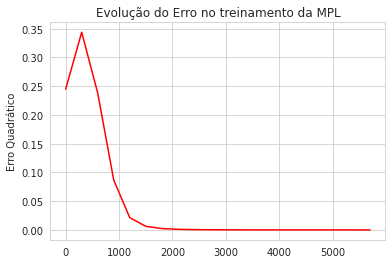

In [53]:
plt.plot(IndiceError, EvolucaoError, 'r') # 'r' is the color red
plt.xlabel('')
plt.ylabel('Erro Quadrático')
plt.title('Evolução do Erro no treinamento da MPL')
plt.show()

## Validação do modelo

In [54]:
# Calcule a precisão dos dados de teste
n_records, n_features = X_test.shape
predictions=0

for xi, yi in zip(X_test.values, y_test.values):

# Forward Pass
        #Camada oculta
        #Calcule a combinação linear de entradas e pesos sinápticos
        hidden_layer_input = np.dot(xi, weights_input_hidden)
        #Aplicado a função de ativação
        hidden_layer_output = sigmoid(hidden_layer_input)
    
        #Camada de Saída
        #Calcule a combinação linear de entradas e pesos sinápticos
        output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)

        #Aplicado a função de ativação 
        output = sigmoid(output_layer_in)

#-------------------------------------------    
    
#Cálculo do Erro da Predição
        ## TODO: Cálculo do Erro        
        if (output[0]>output[1]):
            if (yi[0]>yi[1]):
                predictions+=1
                
        if (output[1]>=output[0]):
            if (yi[1]>yi[0]):
                predictions+=1

print("A Acurácia da Predição é de: {:.3f}".format(predictions/n_records))

A Acurácia da Predição é de: 0.975


# RESPOSTA

**Resumo da solução:**

* Adicionadas as features de "Tamanho" e "Referencia" às 3 features de entrada já utilizadas;
* 5 neurônios na camada de entrada;
* 10 neurônios na camada oculta;
* 2 neurônios na camada de saída;
* 6000 épocas.

A Acurácia da Predição é de: **0.975**